In [8]:
import glob
import sys
import numpy as np
import pandas as pd
import pickle as pk
from IPython.display import HTML
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import normalize

# Genearal analisys

In [2]:
# loadiing entire data-set

### Background

b_name='/home/thiago/Documents/Data_Sets/LPC-anomaly-detection/Input_Background_1.csv'
background = np.genfromtxt(b_name, delimiter=',')
background = background[1:,:]
print(".Background Loaded..." )
print(".Background shape: {}".format(background.shape))

### Signal

s_name='/home/thiago/Documents/Data_Sets/LPC-anomaly-detection/Input_Signal_1.csv'
signal = np.genfromtxt(s_name, delimiter=',')
signal = signal[1:,:]
print(".Signal Loaded...")
print(".Signal shape: {}\n".format(signal.shape))


.Background Loaded...
.Background shape: (543500, 21)
.Signal Loaded...
.Signal shape: (522467, 21)



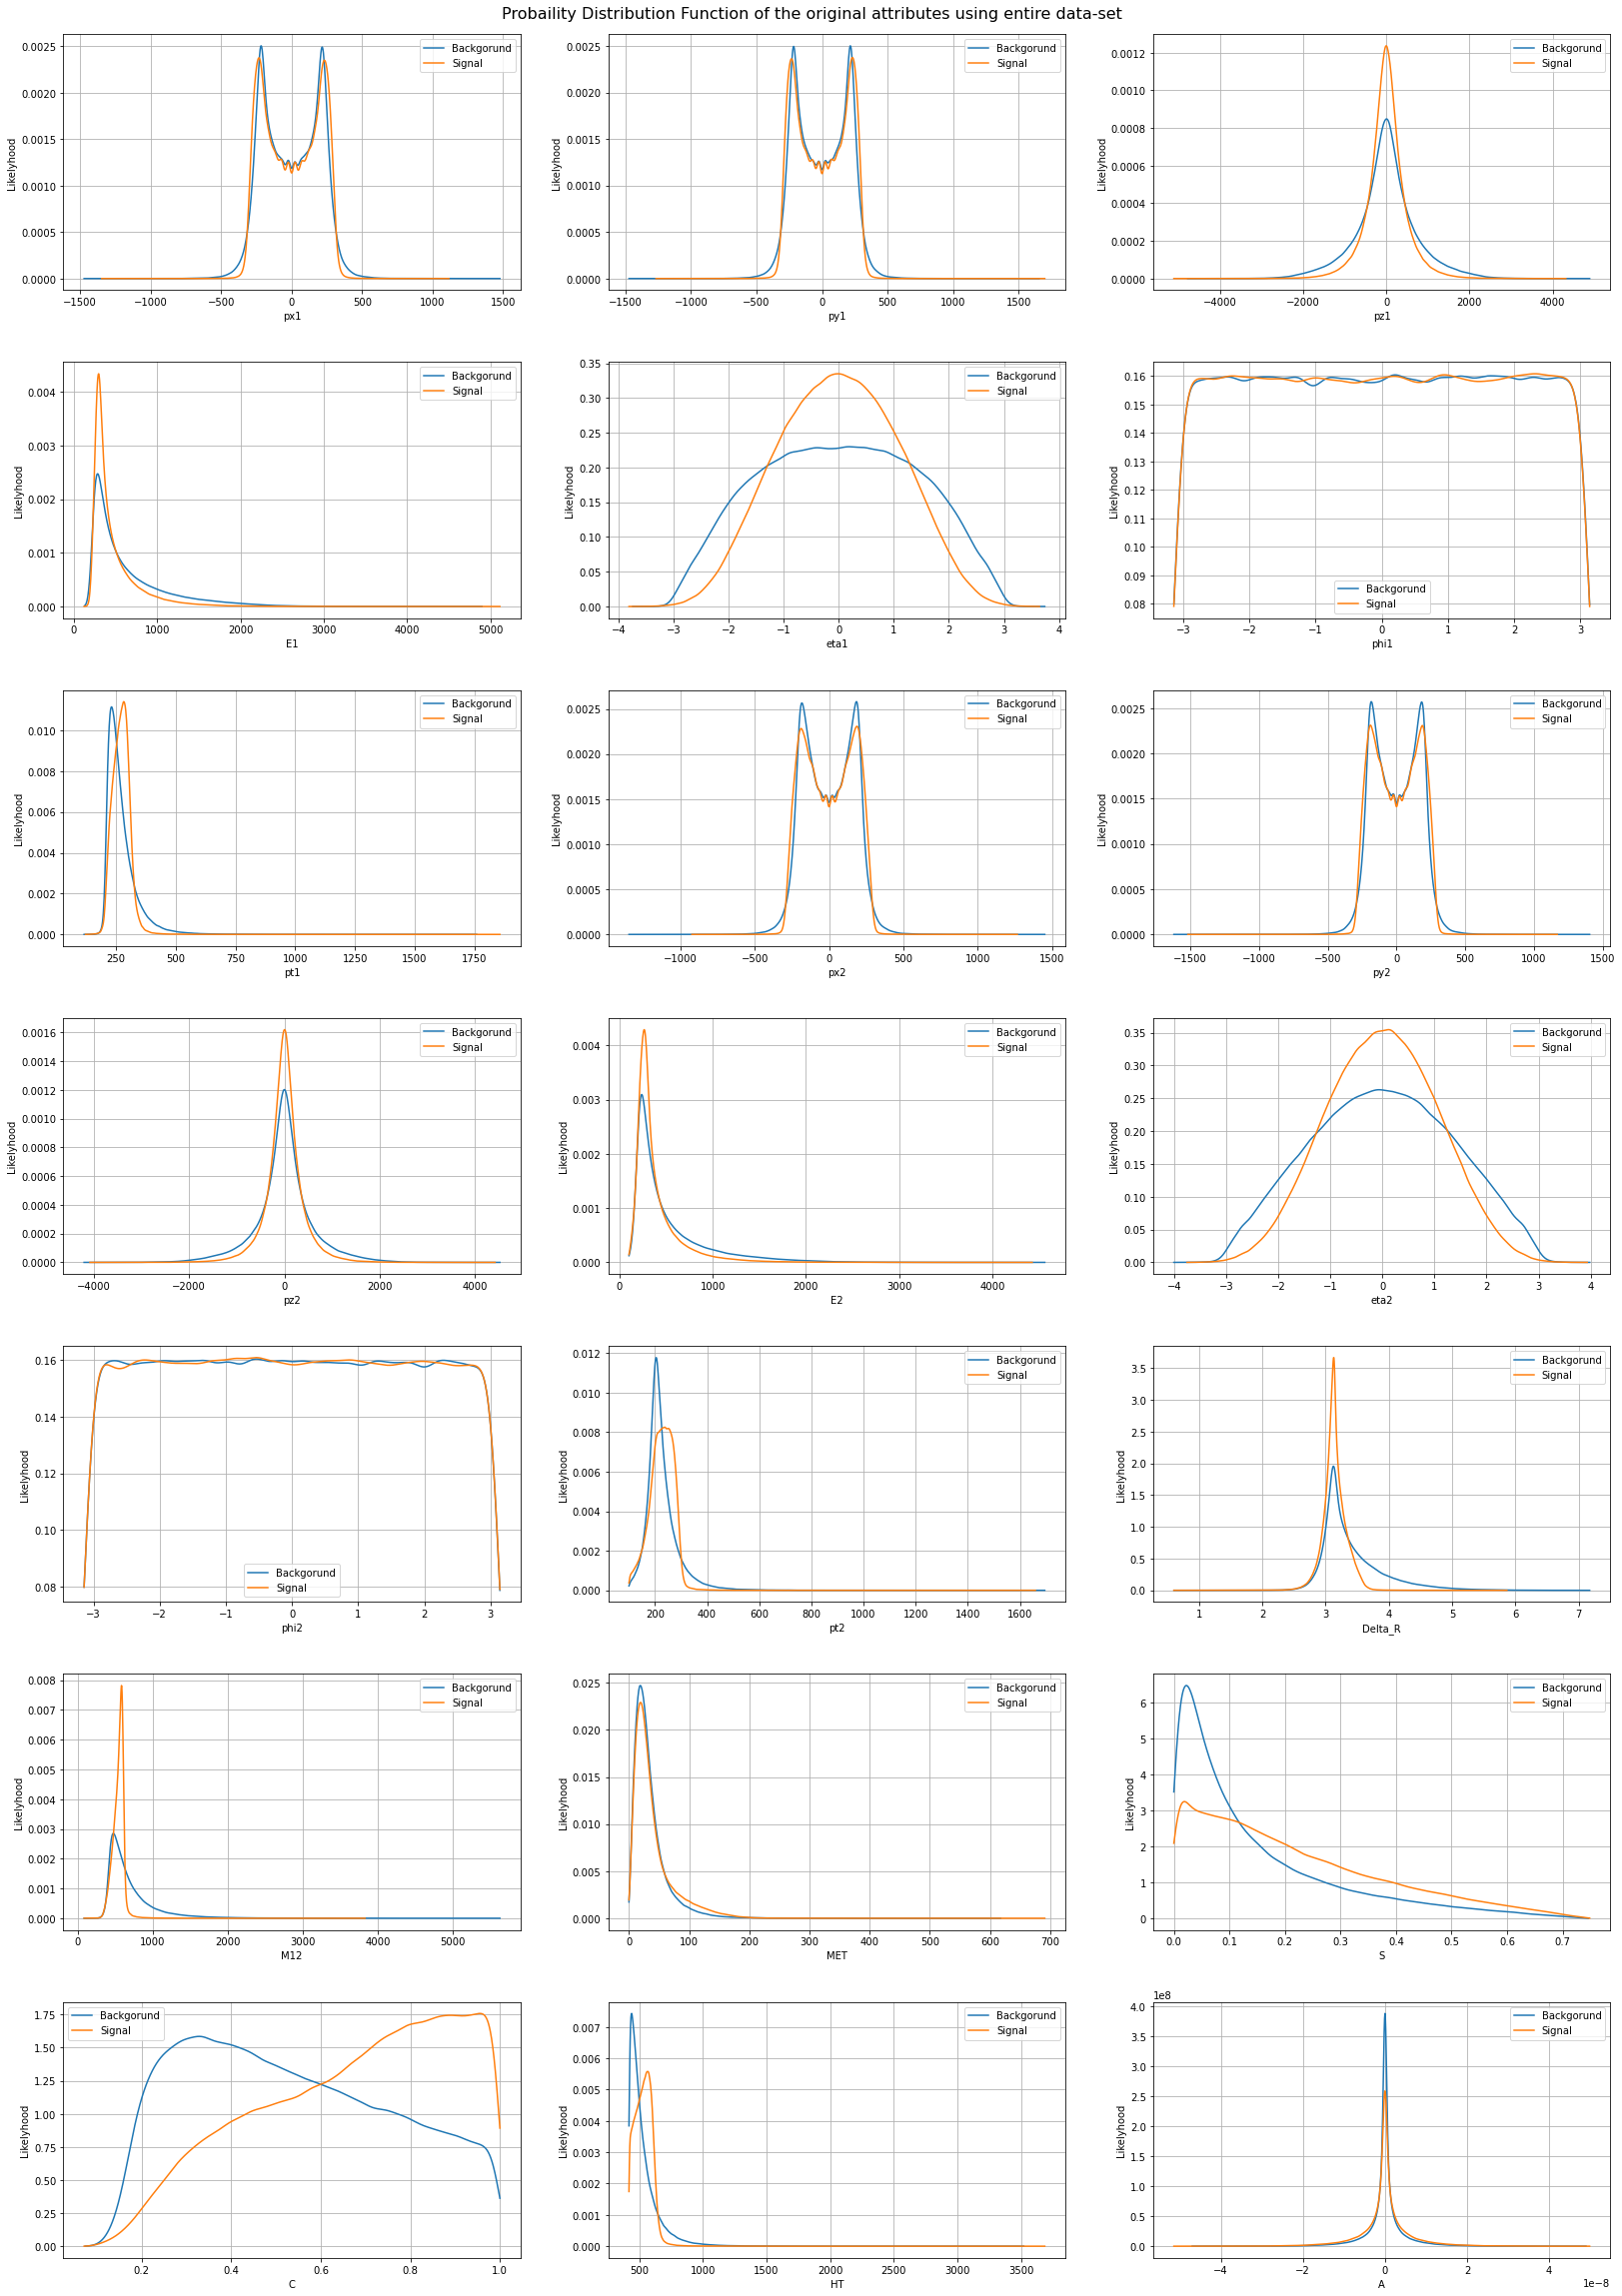

In [4]:
attributes = ["px1","py1","pz1","E1","eta1",
                "phi1","pt1","px2","py2","pz2",
                "E2","eta2","phi2","pt2",
                "Delta_R","M12","MET","S","C",
                "HT","A"]

bg_eval_list = []

sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Probaility Distribution Function of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # computing the attribute distribution

        bg_kernel = stats.gaussian_kde(att_background)

        sg_kernel = stats.gaussian_kde(att_signal)

        # defining attributes limits

        bg_max = max(att_background)

        bg_min = min(att_background)

        sg_max = max(att_signal)

        sg_min = min(att_signal)

        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=1000)

        sg_eval = np.linspace(sg_min,sg_max,num=1000)


        # appending values interval the following analysis

        bg_eval_list.append(bg_eval)

        sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_xlabel(att)
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-PDF-entire-data-set.pdf',format='pdf')

del fig

## Z-score for using geral mean

In [22]:
# Find the min and max values for each column
def dataset_minmax(dataset):

    value_min = min(dataset)
    value_max = max(dataset)
    minmax = [value_min, value_max]

    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    
    for i in range(len(dataset)):
        dataset[i] = (dataset[i] - minmax[0]) / (minmax[1] - minmax[0])


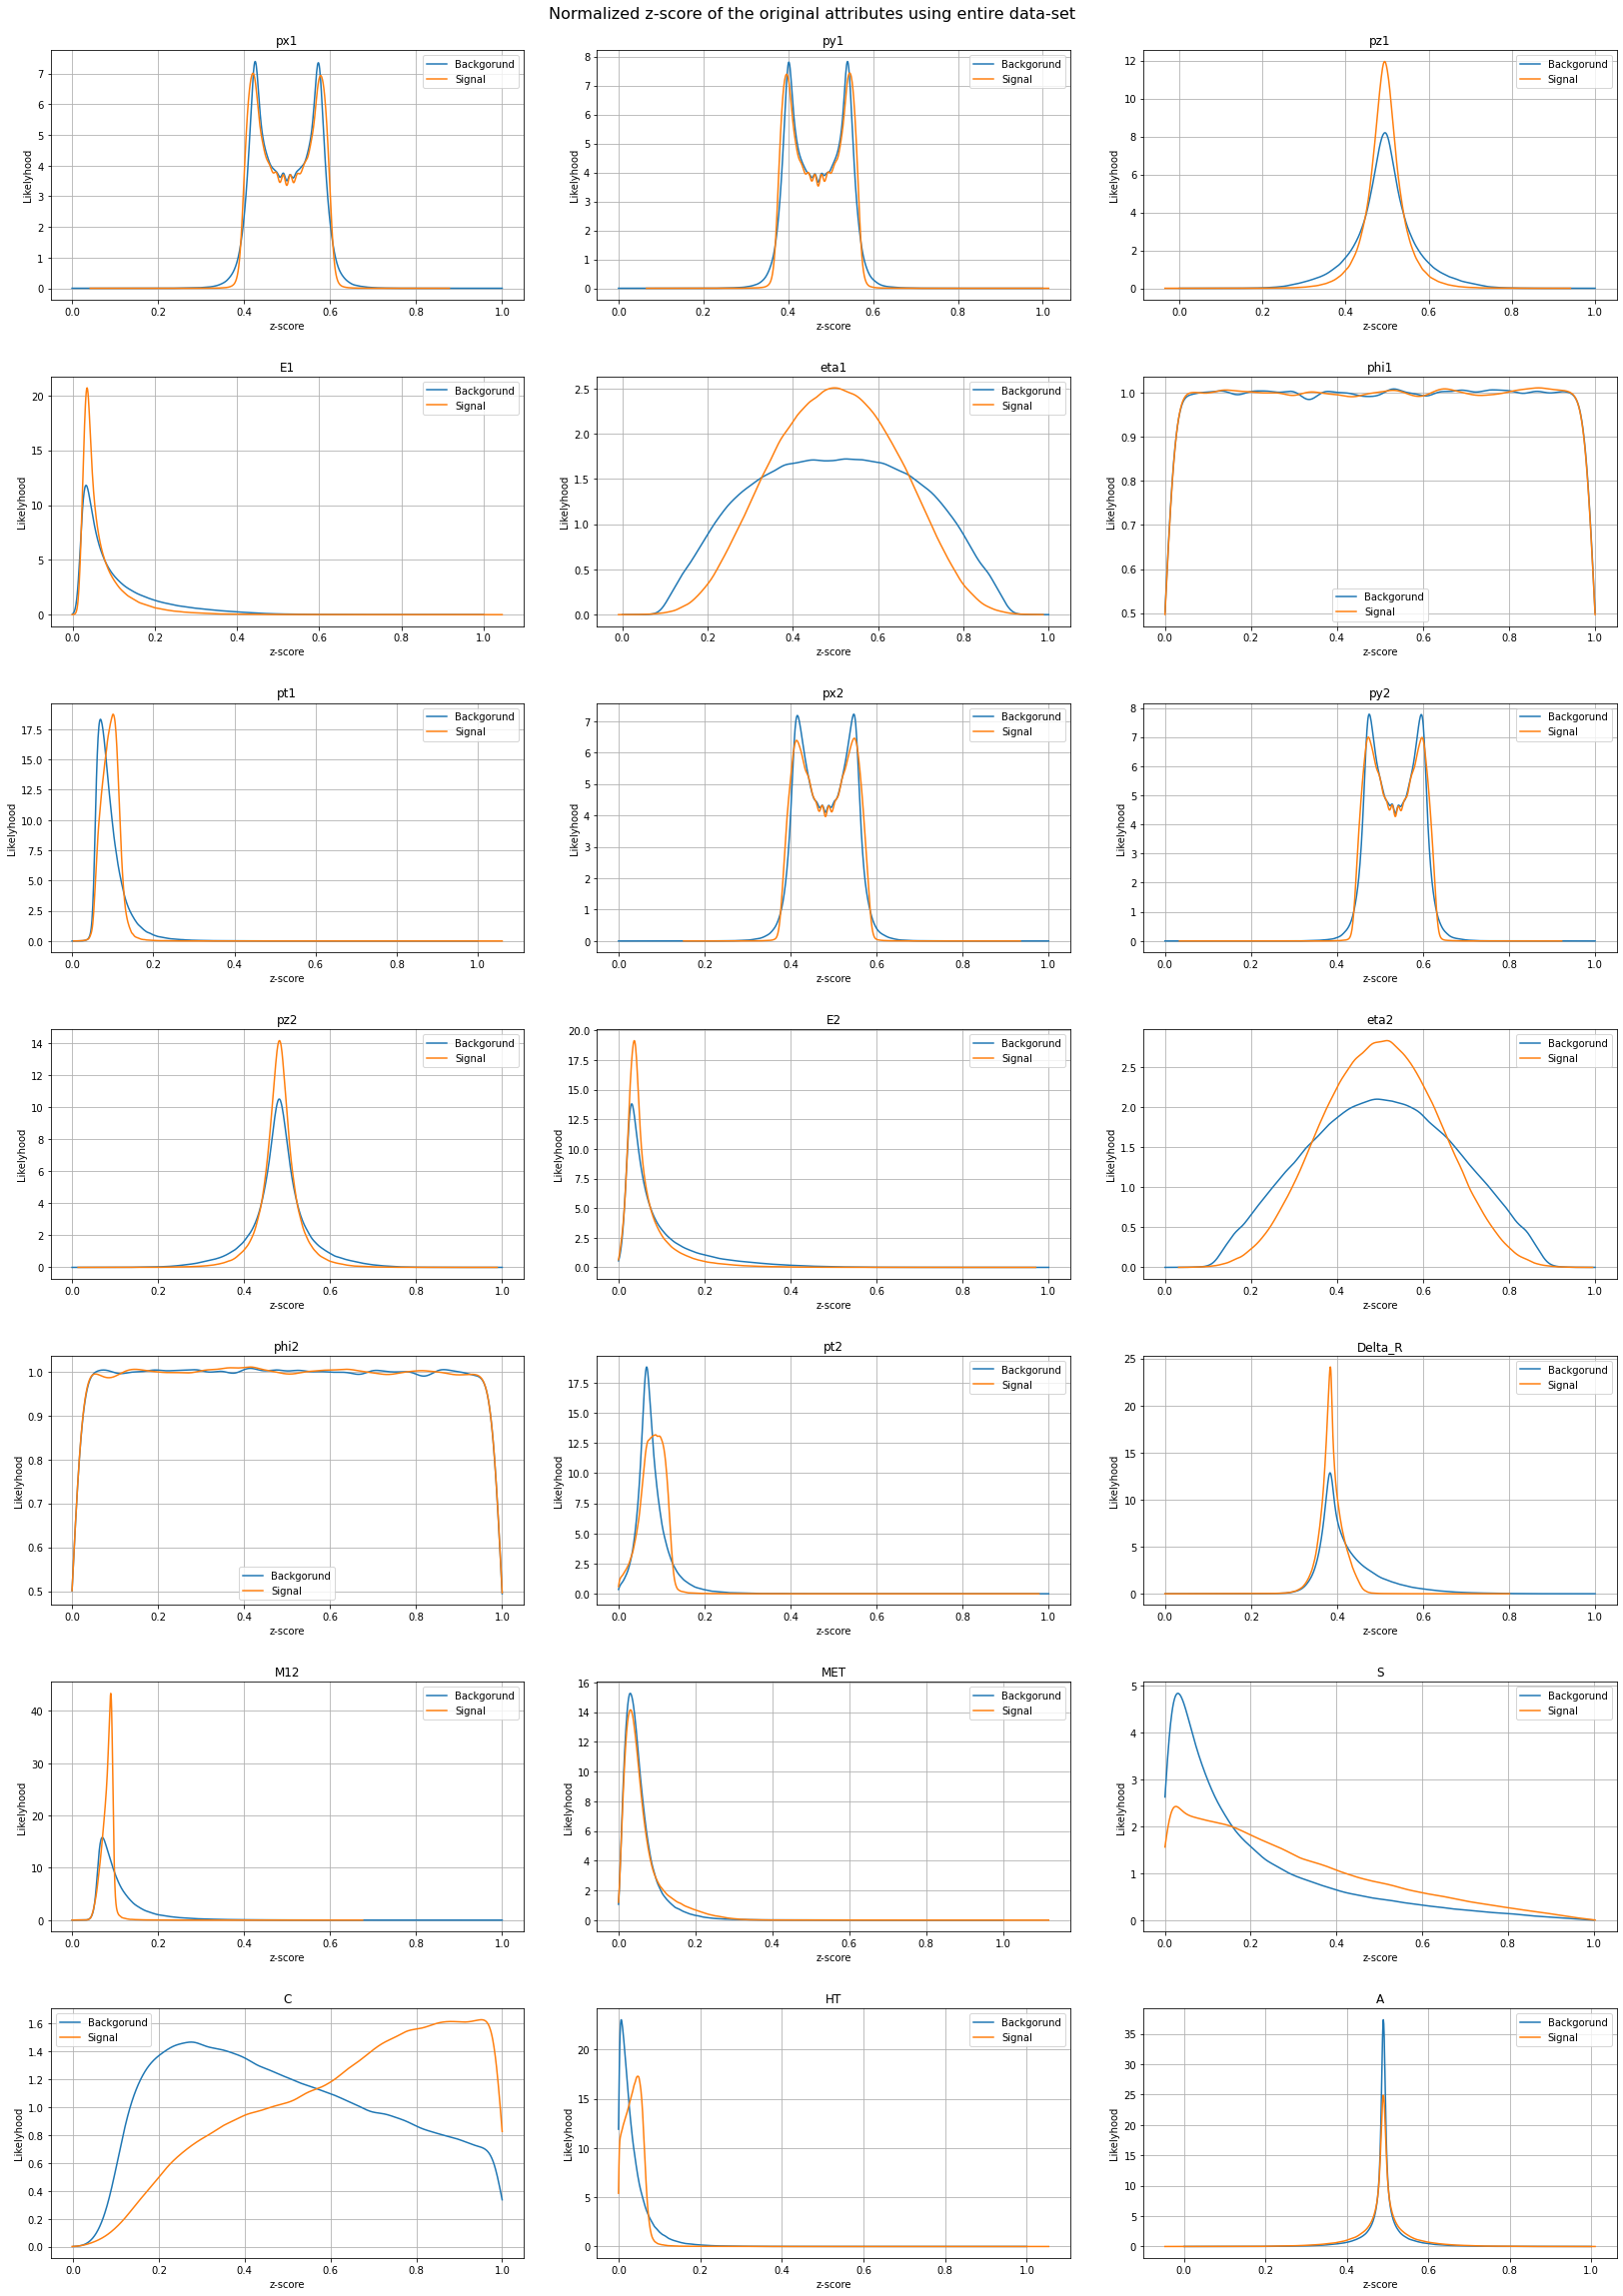

In [25]:
z_bg_eval_list = []

z_sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Normalized z-score of the original attributes using entire data-set', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # unite background and signal for z-score
        # calculation

        all_data = np.hstack((att_background,att_signal))

        mean = np.mean(all_data)

        std = np.std(all_data)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # normalizing

        # Calculate min and max for each column

        bg_minmax = dataset_minmax(bg_zscore)

        sg_minmax = dataset_minmax(sg_zscore)

        # Normalize columns

        normalize_dataset(bg_zscore, bg_minmax)

        normalize_dataset(sg_zscore, bg_minmax)

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(bg_zscore)

        sg_kernel = stats.gaussian_kde(sg_zscore)

        # defining attributes limits

        bg_max = max(bg_zscore)

        bg_min = min(bg_zscore)

        sg_max = max(sg_zscore)

        sg_min = min(sg_zscore)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=1000)

        sg_eval = np.linspace(sg_min,sg_max,num=1000)


        # appending values interval the following analysis

        z_bg_eval_list.append(bg_eval)

        z_sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-z-score-entire-data-set.pdf',format='pdf')

del fig

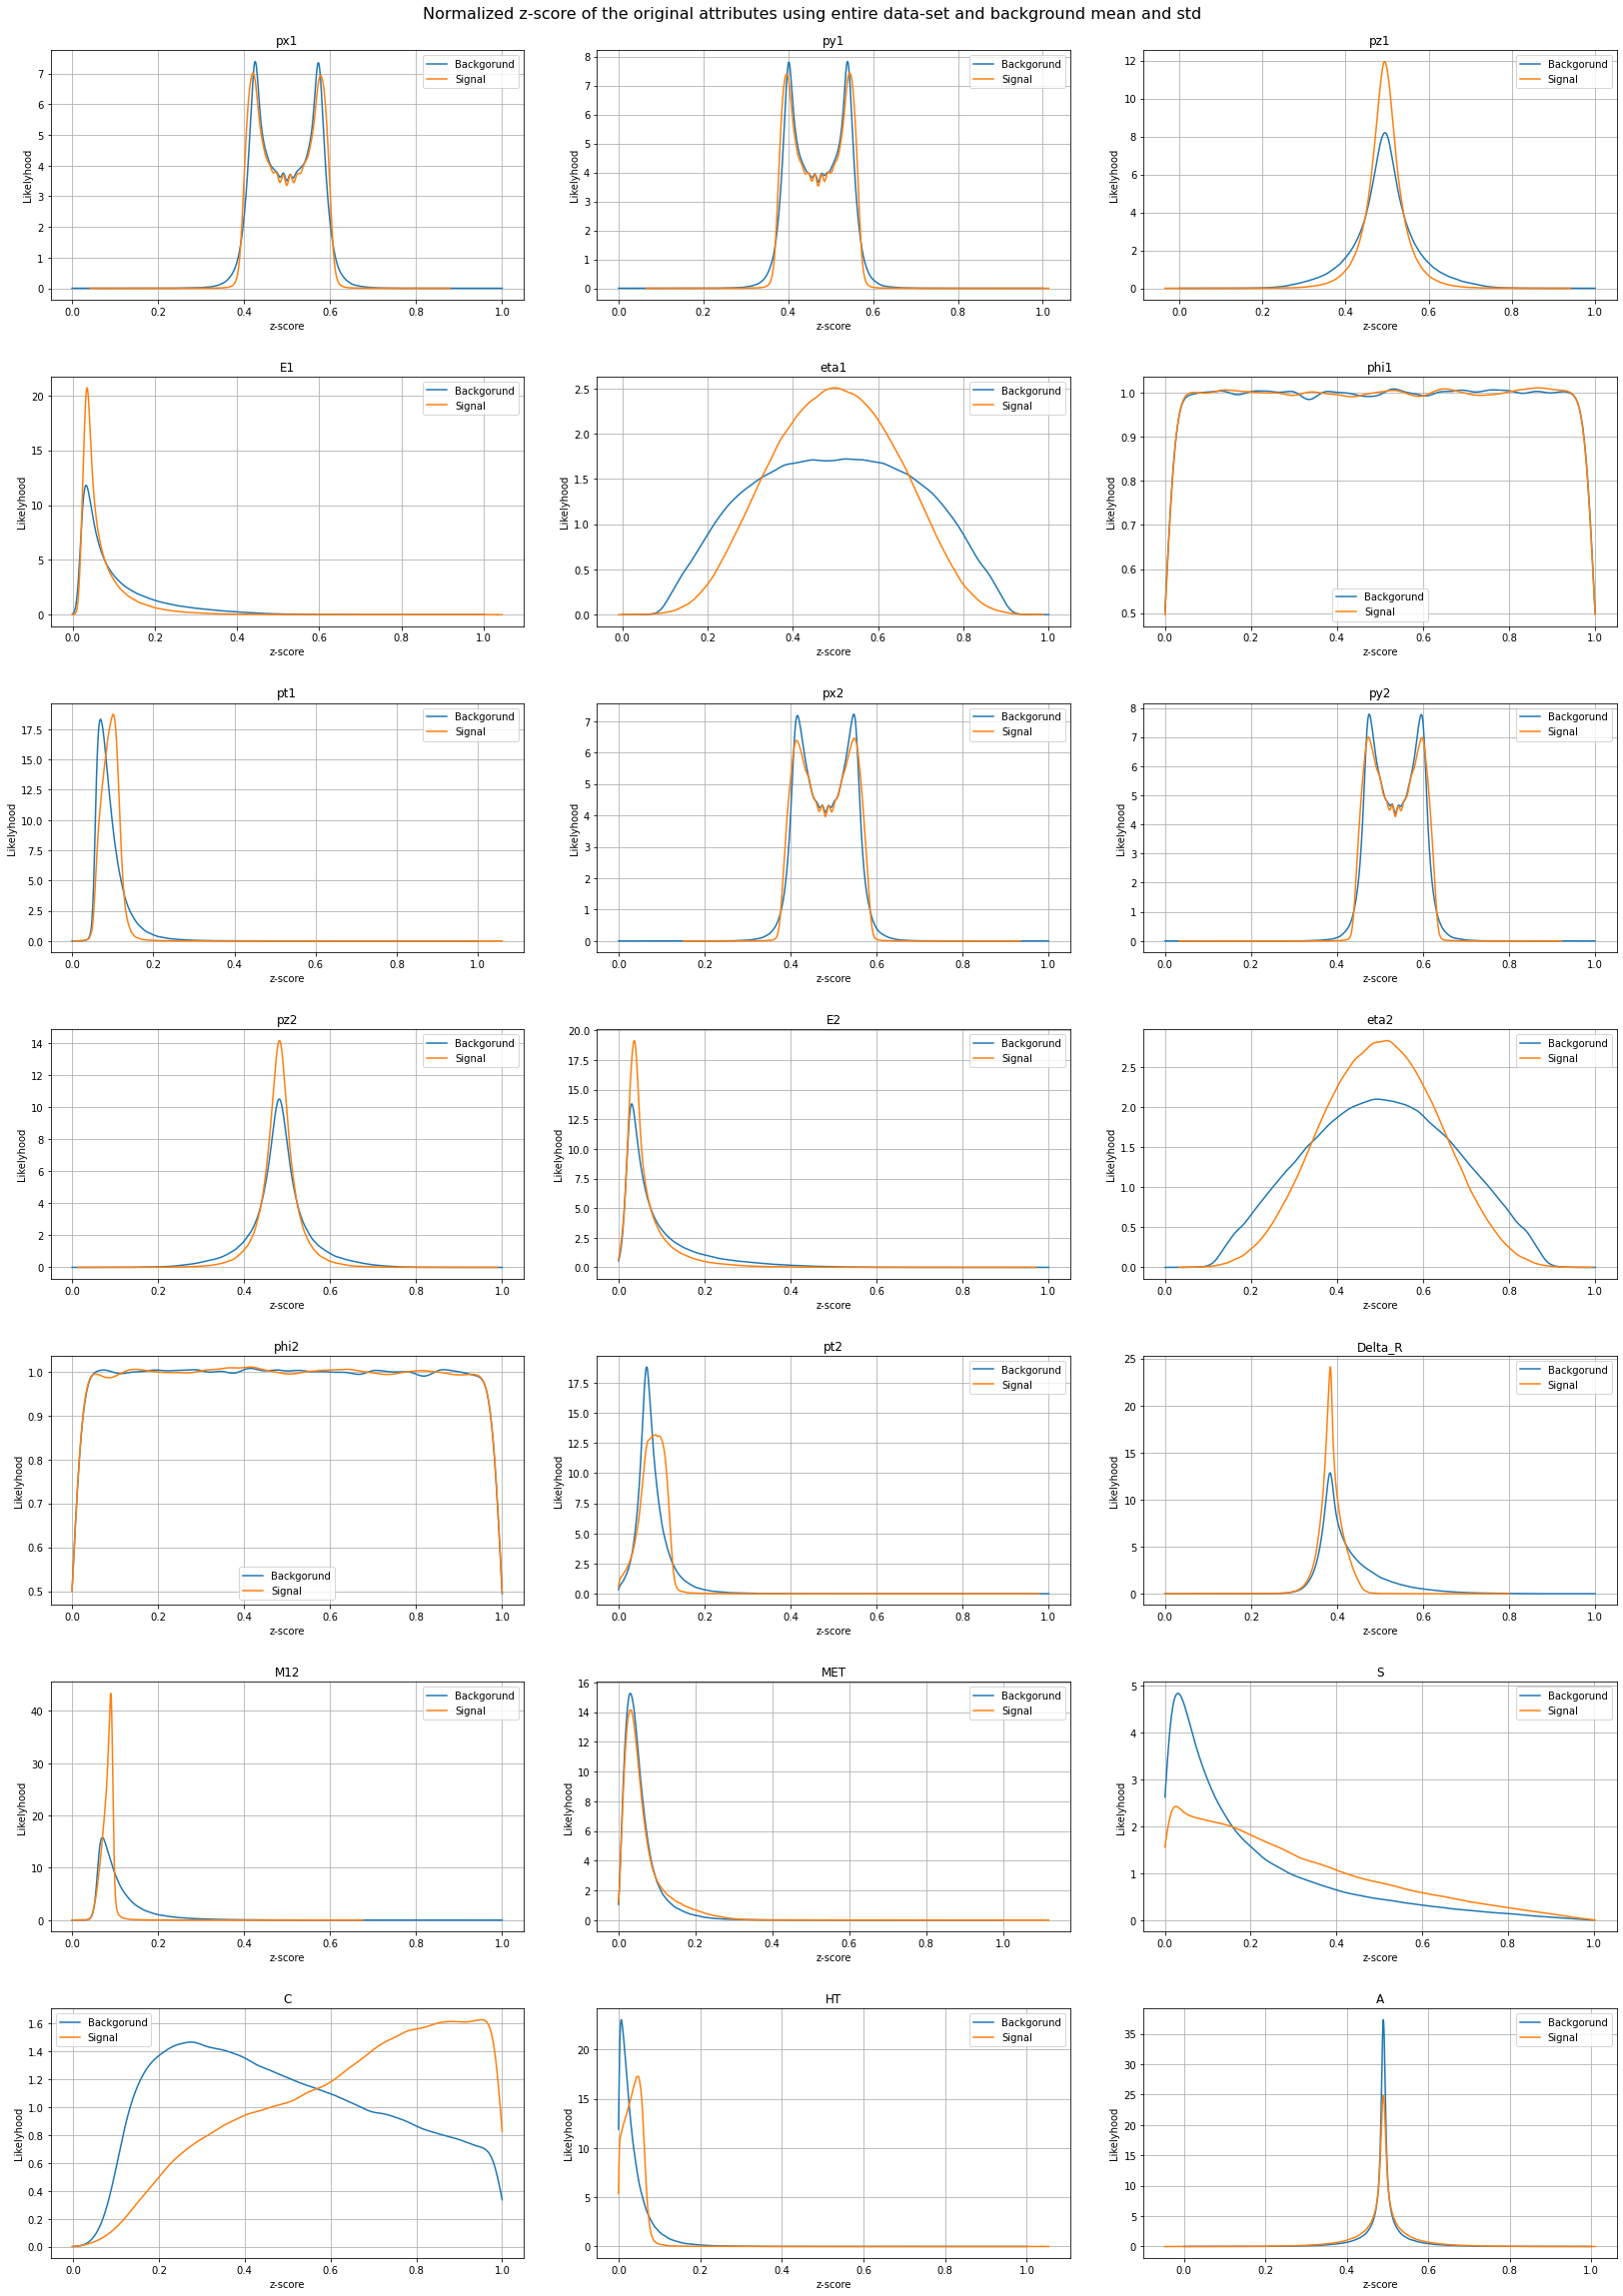

In [26]:
z_bg_eval_list = []

z_sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Normalized z-score of the original attributes using entire data-set and background mean and std', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # getting measures for z-score calculation

        mean = np.mean(att_background)

        std = np.std(att_background)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # normalizing

        # Calculate min and max for each column

        bg_minmax = dataset_minmax(bg_zscore)

        sg_minmax = dataset_minmax(sg_zscore)

        # Normalize columns

        normalize_dataset(bg_zscore, bg_minmax)

        normalize_dataset(sg_zscore, bg_minmax)

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(bg_zscore)

        sg_kernel = stats.gaussian_kde(sg_zscore)

        # defining attributes limits

        bg_max = max(bg_zscore)

        bg_min = min(bg_zscore)

        sg_max = max(sg_zscore)

        sg_min = min(sg_zscore)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=1000)

        sg_eval = np.linspace(sg_min,sg_max,num=1000)


        # appending values interval the following analysis

        z_bg_eval_list.append(bg_eval)

        z_sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-z-score-from-bg-entire-data-set.pdf',format='pdf')

del fig

## $\frac{EDA}{z-score(Centrality)}$

In [28]:
import math as m

def hand_norm(A):
    return m.sqrt(np.sum(A ** 2))

def hand_scalar_prod(A,B):
    prod = np.zeros((len(A)))
    k = 0
    for a,b in (zip(A,B)):
        prod[k]= a * b 
        k +=1
        
    return np.sum(prod)

def hand_dist(A,B, metric = 'euclidean'):
    dist = np.zeros((len(A),(len(A))))
    if metric == 'euclidean':
        for i in range(len(A)):
            for ii in range(len(B)):
                dist[ii,i] = m.sqrt(np.sum((A[i,:] - B[ii,:]) ** 2))

    if metric == 'cosine':
        for i in range(len(A)):
            for ii in range(len(B)):
                dist[ii,i] = 1 - (hand_scalar_prod(A[i,:],B[ii,:])/(hand_norm(A[i,:])*hand_norm(B[ii,:])))
            
    if metric == 'mahalanobis':
        concat = np.zeros((len(A)+len(B),len(A[0])))
        concat[:len(A)] = A
        concat[len(A):] = B        
        VI = np.linalg.inv(np.cov(concat.T)).T
        for i in range(len(A)):
            for ii in range(len(B)):
                dist[ii,i] = np.sqrt(np.dot(np.dot((A[i,:]-B[ii,:]),VI),(A[i,:]-B[ii,:]).T))
            
    return dist

def EDA_calc (data, metric='euclidean'):            

    dist = hand_dist(data, data, metric=metric)
    
    CP = 1/np.sum(dist**2,axis=0)

    GD = np.sum(CP)/(2*CP)

    return GD

def EDA_calc_v2 (data,lbd,metric='euclidean'):            

    dist = hand_dist(data, data, metric=metric)
    
    CP = np.sum(dist**2,axis=0)

    LD = np.sum(CP)/(2*len(data)*CP)

    # getting measures for z-score calculation

    mean = np.mean(data[:,18])

    std = np.std(data[:,18])

    # calculation zscore

    zscore = (data[:,18] - mean)/std

    GD = LD/(lbd*zscore)

    return GD

In [ ]:
z_bg_eval_list = []

z_sg_eval_list = []

size_scaler = 8

fig = plt.figure(figsize= (2.9 * size_scaler, 4.1 * size_scaler))

ax = fig.subplots(7,3)

fig.suptitle('Normalized z-score of the original attributes using entire data-set and background mean and std', fontsize=16)

for i,att in enumerate(attributes):

        # getting attributes values

        att_background = background[:,i]

        att_signal = signal[:,i]

        # getting measures for z-score calculation

        mean = np.mean(att_background)

        std = np.std(att_background)

        # calculation zscore

        bg_zscore = (att_background - mean)/std
        
        sg_zscore = (att_signal - mean)/std

        # normalizing

        # Calculate min and max for each column

        bg_minmax = dataset_minmax(bg_zscore)

        sg_minmax = dataset_minmax(sg_zscore)

        # Normalize columns

        normalize_dataset(bg_zscore, bg_minmax)

        normalize_dataset(sg_zscore, bg_minmax)

        # computing the zscore distribution

        bg_kernel = stats.gaussian_kde(bg_zscore)

        sg_kernel = stats.gaussian_kde(sg_zscore)

        # defining attributes limits

        bg_max = max(bg_zscore)

        bg_min = min(bg_zscore)

        sg_max = max(sg_zscore)

        sg_min = min(sg_zscore)


        # creating values interval for time optimization

        bg_eval = np.linspace(bg_min,bg_max,num=1000)

        sg_eval = np.linspace(sg_min,sg_max,num=1000)


        # appending values interval the following analysis

        z_bg_eval_list.append(bg_eval)

        z_sg_eval_list.append(sg_eval)

        # calculating the likelyhood with kde kernel

        bg_likelyhood = bg_kernel(bg_eval)

        sg_likelyhood = sg_kernel(sg_eval)

        # defining plot locationg

        line = int(i//3)

        col = int(i%3)

        # ploting results

        ax[line,col].plot(bg_eval, bg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Backgorund')

        ax[line,col].plot(sg_eval, sg_likelyhood, 
                ms=3.5, linestyle='-',
                label= 'Signal')

        ax[line,col].legend()
        ax[line,col].set_title(att)
        ax[line,col].set_xlabel("z-score")
        ax[line,col].set_ylabel("Likelyhood")
        ax[line,col].grid()

fig.tight_layout(pad=3.0)

plt.savefig('figures/original-attributes-z-score-from-bg-entire-data-set.pdf',format='pdf')

del fig

In [9]:
# define the paths into the container
data_path  = 'data-divisions/*'

# create a list of config files

file_list  = glob.glob(data_path)

# creating data divisions dictionary

divisions_dict = {}

# getting number of divisions

n_elements = len(file_list)

print('Reading data divisions...')

for i,file_name in enumerate(file_list):

    with open(file_name, 'rb') as f:
        division = pk.load(f)

    divisions_dict[i] = division

    # updating progress bar

    percent = (i+1)/n_elements * 100

    info = '{:.2f}% - {:d} of {:d}'.format(percent,(i+1),n_elements)

    formated_bar = '-'*int(percent) + ' '*int(100-percent)

    if i < (n_elements):
        sys.stdout.write("\r")

    sys.stdout.write('[%s] %s' % (formated_bar,info))
    sys.stdout.flush()


Reading data divisions...
[----------------------------------------------------------------------------------------------------] 100.00% - 33 of 33